In [1]:
import pandas as pd
import numpy as np
from scipy import stats
from scipy.stats import norm
from scipy.stats import t
import random
import statistics
import pathlib
import sys
import math
import matplotlib.pyplot as plt

levers include dict_keys(['BASE', 'ME', 'FYI', 'MIU', 'LTE', 'REU', 'REC'])


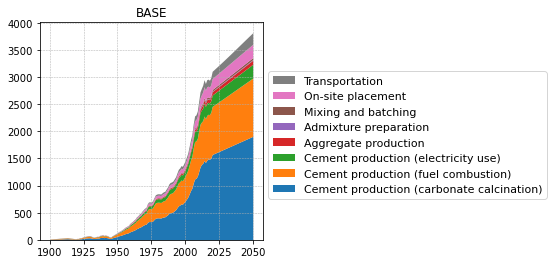

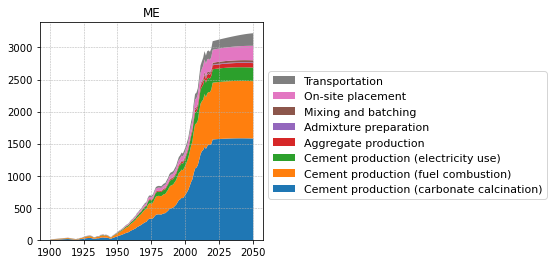

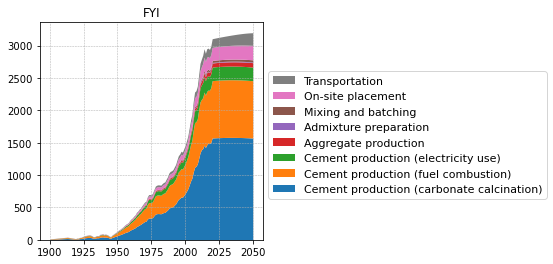

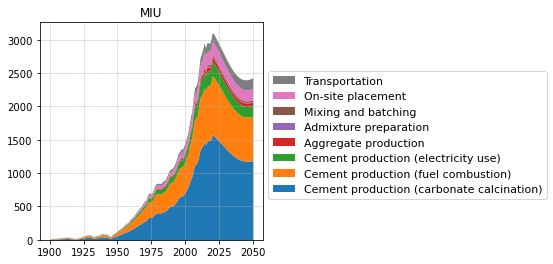

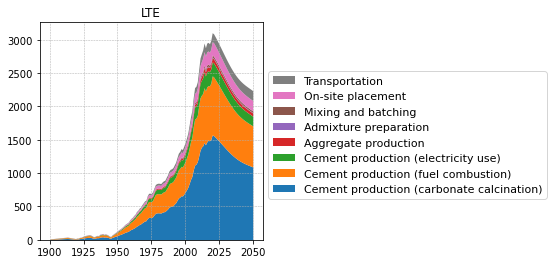

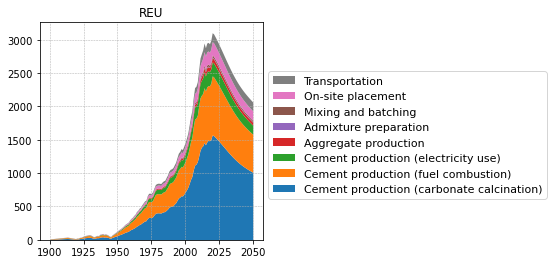

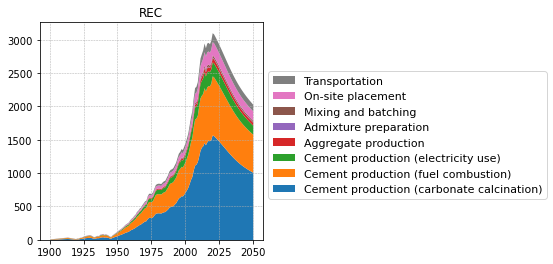

In [2]:
Data = pd.read_excel (io = r'Data_input.xlsx', sheet_name="Input_base",nrows=151)
Data_ME = pd.read_excel (io = r'Data_input.xlsx', sheet_name="Input_ME",nrows=151)

lever_list = {
    # baseline
    'BASE': [],
    
    # material-efficient design
    'ME'  : ["Res concrete intensity",
             "NonR concrete intensity",
             "Civ concrete intensity",
             "Cement content of concrete"],
    
    # fabrication yield improvement
    'FYI':  ["Construction yield"],
    
    # more intensive use
    'MIU':  ["Res concrete stock",
             "NonR concrete stock",
             "Civ concrete stock",
             "Res mortar stock",
             "NonR mortar stock",
             "Civ mortar stock"],
    
    # lifetime extention
    'LTE':  ["Res life","NonR life","Civ life"],
    
    # component reuse
    'REU':  ["Reuse rate"],
    
    # downcycling
    'REC':  ["Recycling rate","Downcycling rate"]
    }

lever_list_story = {
    'BASE':lever_list['BASE'],
    'ME'  :lever_list['BASE']+lever_list['ME'],
    'FYI' :lever_list['BASE']+lever_list['ME']+lever_list['FYI'],
    'MIU' :lever_list['BASE']+lever_list['ME']+lever_list['FYI']+lever_list['MIU'],
    'LTE' :lever_list['BASE']+lever_list['ME']+lever_list['FYI']+lever_list['MIU']+lever_list['LTE'],
    'REU' :lever_list['BASE']+lever_list['ME']+lever_list['FYI']+lever_list['MIU']+lever_list['LTE']+lever_list['REU'],
    'REC' :lever_list['BASE']+lever_list['ME']+lever_list['FYI']+lever_list['MIU']+lever_list['LTE']+lever_list['REU']+lever_list['REC'],
        }
    
print("levers include " + str(lever_list_story.keys()))

for scenario_index in lever_list_story:
    scenarios = lever_list_story[scenario_index]

    if len(scenarios)>0:
        for i in range(0,len(scenarios)):
            Data[scenarios[i]] = Data_ME[scenarios[i]]
    
    # inflow matrix
    in_func_con_matrix = pd.DataFrame()
    in_func_con_matrix = pd.concat([Data["Res concrete inflow"].dropna(),
                                    Data["NonR concrete inflow"].dropna(),
                                    Data["Civ concrete inflow"].dropna(),],axis=1)
    in_func_mor_matrix = pd.DataFrame()
    in_func_mor_matrix = pd.concat([Data["Res mortar inflow"].dropna(),
                                    Data["NonR mortar inflow"].dropna(),
                                    Data["Civ mortar inflow"].dropna(),],axis=1)
    
    # outflow matrix
    ot_con_matrix = pd.DataFrame()
    ot_con_matrix = pd.concat([Data["Res concrete outflow"].dropna(),
                               Data["NonR concrete outflow"].dropna(),
                               Data["Civ concrete outflow"].dropna(),],axis=1)
    ot_mor_matrix = pd.DataFrame()
    ot_mor_matrix = pd.concat([Data["Res mortar outflow"].dropna(),
                               Data["NonR mortar outflow"].dropna(),
                               Data["Civ mortar outflow"].dropna(),],axis=1)
    
    # stock matrix
    st_func_con_matrix= pd.DataFrame()
    st_func_con_matrix = pd.concat([Data["Res concrete stock"],Data["NonR concrete stock"],Data["Civ concrete stock"]],axis=1)
    st_func_mor_matrix = pd.DataFrame()
    st_func_mor_matrix = pd.concat([Data["Res mortar stock"],Data["NonR mortar stock"],Data["Civ mortar stock"]],axis=1)
    
    # lifetime matrix
    life_matrix = pd.DataFrame()
    life_matrix = pd.concat([Data["Res life"],Data["NonR life"],Data["Civ life"]],axis=1)
    
    # material intensity matrix
    MI_con_matrix = pd.DataFrame()
    MI_con_matrix = pd.concat([Data["Res concrete intensity"],
                               Data["NonR concrete intensity"],
                               Data["Civ concrete intensity"]],axis=1)
    
    MI_mor_matrix = pd.DataFrame()
    MI_mor_matrix = pd.concat([Data["Res mortar intensity"],
                               Data["NonR mortar intensity"],
                               Data["Civ mortar intensity"]],axis=1)
    
    # run the model
    import model
    model.stock_driven_MFA(in_func_con_matrix                 = in_func_con_matrix, 
                           in_func_mor_matrix                 = in_func_mor_matrix,
                           ot_con_matrix                      = ot_con_matrix, 
                           ot_mor_matrix                      = ot_mor_matrix,
                           st_func_con_matrix                 = st_func_con_matrix, 
                           st_func_mor_matrix                 = st_func_mor_matrix,
                           life_matrix                        = life_matrix,
                           MI_con_matrix                      = MI_con_matrix, 
                           MI_mor_matrix                      = MI_mor_matrix,
                           recycling_rate                     = Data["Recycling rate"],
                           downcycling_rate                   = Data["Downcycling rate"],
                           hibernating_stock_rate             = Data["Hibernating stock rate"],
                           reuse_rate                         = Data["Reuse rate"],
                           construction_yield                 = Data["Construction yield"],
                           cement_content_concrete            = Data["Cement content of concrete"],
                           water_content_concrete             = Data["Water content of concrete"],
                           fine_aggregates_content_concrete   = Data["Fine aggregates content of concrete"],
                           coarse_aggregates_content_concrete = Data["Coarse aggregates content of concrete"], 
                           slag_content_concrete              = Data["Slag content of concrete"],
                           ash_content_concrete               = Data["Fly ash content of concrete"],
                           cement_content_mortar              = Data["Cement content of mortar"],
                           water_content_mortar               = Data["Water content of mortar"],
                           fine_aggregates_content_mortar     = Data["Fine aggregates content of mortar"],
                           coarse_aggregates_content_mortar   = Data["Coarse aggregates content of mortar"], 
                           slag_content_mortar                = Data["Slag content of mortar"],
                           ash_content_mortar                 = Data["Fly ash content of mortar"],
                           clinker_ratio                      = Data["Clinker ratio"],
                           gypsum_ratio                       = Data["Gypsum ratio"],
                           slag_ratio                         = Data["Slag ratio"],
                           ash_ratio                          = Data["Fly ash ratio"],
                           limestone_ratio                    = Data["Limestone ratio"],
                           pozzolana_ratio                    = Data["Natural pozzolana ratio"],
                           CKD_generation_rate                = Data["CKD generation rate"],
                           proportion_landfilled_CKD          = Data["Proportion of landfilled CKD"],
                           manufacturing_yield                = Data["Manufacturing yield"],
                           process_emission_factor            = Data["Process emission factor"],
                           thermal_energy                     = Data["Thermal energy"],
                           carbon_intensity_fuel              = Data["Carbon intensity of the fuel mix"],
                           electricity_cement                 = Data["Electricity for cement"],
                           electricity_emission_factor        = Data["Electricity emission factor"],
                           aggregate_emission_factor          = Data["Emission factor for aggregate production"],
                           electricity_slag                   = Data["Electricity for slag"],
                           electricity_ash                    = Data["Electricity for fly ash"],
                           mixing_emission_factor             = Data["Emission factor for mixing and batching"],
                           placement_emission_factor          = Data["Emission factor for on-site placement"],
                           transportation_cement              = Data["Transportation of cement"],
                           transportation_admixtures          = Data["Transportation of mineral admixtures"],
                           transportation_virgin_aggregate    = Data["Transportation of virgin aggregate"],
                           transportation_buried_aggregate    = Data["Transportation of buried aggregate"],
                           transportation_recycled_aggregate  = Data["Transportation of recycled aggregate"],
                           year                               = Data["Year"],
                           scenario_index                     = scenario_index)